In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
from scipy import stats
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
#from sklearn.neighbors import LocalOutlierFactor

rng = np.random.RandomState(42)

In [2]:
transactions = pd.read_csv('data/transactionData_clean.csv')

In [3]:
labels = pd.read_csv('data/labelledData_15.csv')

In [4]:
X_train = transactions.values

In [5]:
outliers_fraction = sum(labels['Class'])/float(len(labels))
print(outliers_fraction)

0.000400006720671


# One-class SVM

In [ ]:
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma='auto', verbose=True)

In [ ]:
clf.fit(X_train)

In [ ]:
pred = clf.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
%matplotlib inline

conf_matrix = confusion_matrix(labels['Class'], pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=[0, 1], yticklabels=[0, 1], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Robust covariance

In [7]:
clf_rc = EllipticEnvelope(contamination=outliers_fraction)

In [20]:
clf_rc.fit(X_train)

/home/charlioxumykj/miniconda3/envs/aind/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-15.298439062145698 > -15.327243001326046)
  % (det, previous_det), RuntimeWarning)
/home/charlioxumykj/miniconda3/envs/aind/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-15.306383040389107 > -15.326569326103543)
  % (det, previous_det), RuntimeWarning)
/home/charlioxumykj/miniconda3/envs/aind/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-15.334962599672272 > -15.366995293077652)
  % (det, previous_det), RuntimeWarning)
/home/charlioxumykj/miniconda3/envs/aind/lib/python3.6/site-packages/sklearn/covariance/robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-15.320198099485614 > -15.561208357686379)
  % (det, previous_det), RuntimeWarning)
/home/charlioxumykj/minicond

KeyboardInterrupt: 

In [9]:
pred_rc = clf_rc.predict(X_train)

In [17]:
print(len(pred_rc))
pred_rc = (pred_rc-1)*(-1)/2
print(len(pred_rc[pred_rc==0]))
print(len(pred_rc[pred_rc==1]))

15772235
15765926
6309


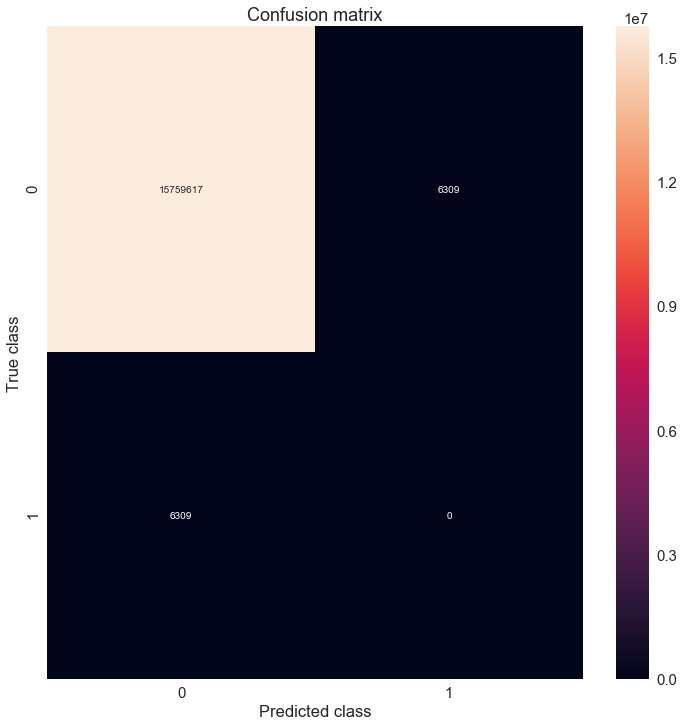

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
%matplotlib inline

conf_matrix = confusion_matrix(labels['Class'], pred_rc)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=[0, 1], yticklabels=[0, 1], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Isolation Forest

In [21]:
clf_if = IsolationForest(max_samples=20000, contamination=outliers_fraction, random_state=rng, verbose=True)

In [ ]:
clf_if.fit(X_train)

In [ ]:
pred_if = clf_if.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
%matplotlib inline

conf_matrix = confusion_matrix(labels['Class'], pred_if)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=[0, 1], yticklabels=[0, 1], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Local Outlier Factor

In [ ]:
clf_lof = LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction, verbose=True)

In [ ]:
pred_lof = clf_lof.fit_predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
%matplotlib inline

conf_matrix = confusion_matrix(labels['Class'], pred_lof)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=[0, 1], yticklabels=[0, 1], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()